<a href="https://colab.research.google.com/github/hector2506/aprendizado-pytorch/blob/main/Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network to classify iris flowers

The neural network will use the Iris Data Set

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Create a Model Class that inherits nn.Module
class Neural_Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    # relu = rectified linear unit, it does something,
    # if the output is less than 0, it becomes 0,
    # if it's more than 0, it uses the output
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [15]:
# Pick a manual seed for randomization
torch.manual_seed(41)

# Create an instance of our model
model = Neural_Model()

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_dataframe = pd.read_csv(url)
my_dataframe

In [ ]:
# Change last column from string to float
my_dataframe['species'] = my_dataframe['species'].replace("setosa", 0.0)
my_dataframe['species'] = my_dataframe['species'].replace("versicolor", 1.0)
my_dataframe['species'] = my_dataframe['species'].replace("virginica", 2.0)
my_dataframe

In [18]:
# Train Test Split! Set X (features), y (outcome)
X = my_dataframe.drop("species", axis=1)
y = my_dataframe["species"]

In [19]:
# Convert to numpy arrays
X = X.values
y = y.values

In [20]:
# Train Test Split
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [21]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [22]:
# Convert y labels to tensors long (64-bit Integers)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [23]:
# Set the criterion of model to measure the error
# how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

# Choose Optimizer (using Adam), and the learning rate (lr)
# if error doesn't go down after a lot of epochs, we might
# want to lower our lr
# model.parameters take our Neural_Model's fc1, fc2, and out
# it is the neural network's layers
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [24]:
# Train our model
# Determine how many epochs
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error
  loss = criterion(y_pred, y_train) # predicted values vs y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Back propagation: take the error rate of forward propagation
  # and feed it back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.2676880657672882
Epoch: 60 and loss: 0.17942363023757935
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118418931961
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'epoch')

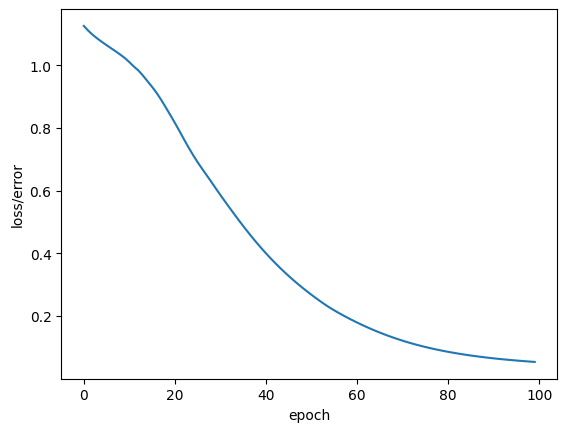

In [25]:
# Put it on a graph
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

In [26]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propagation
  # X_test are features from our test set
  # y_eval will be predictions
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test) # Find the loss/error

In [27]:
loss

tensor(0.1315)

In [34]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our
    # network thinks it is, that is, the one with
    # the highest number
    print(f'{i+1} {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct+=1

print(f"We got {correct} correct")

1 tensor([-5.8760,  4.4628,  6.5124]) 	 2 	 2
2 tensor([-7.5436,  4.1670,  9.7255]) 	 2 	 2
3 tensor([-8.4504,  5.1271, 10.1987]) 	 2 	 2
4 tensor([-4.3398,  5.6267,  2.5608]) 	 1 	 1
5 tensor([-7.1825,  4.8754,  8.2992]) 	 2 	 2
6 tensor([-3.3974,  5.3463,  1.2803]) 	 1 	 1
7 tensor([-5.9231,  4.9822,  5.9997]) 	 2 	 2
8 tensor([-4.2881,  5.7003,  2.3889]) 	 1 	 1
9 tensor([-6.5356,  4.9257,  7.1260]) 	 2 	 2
10 tensor([-8.0509,  4.4129, 10.3286]) 	 2 	 2
11 tensor([-5.6762,  4.9500,  5.6215]) 	 2 	 2
12 tensor([ 4.5662, -2.2476, -2.8911]) 	 0 	 0
13 tensor([ 4.2571, -1.9967, -2.7330]) 	 0 	 0
14 tensor([-2.1108,  4.0515,  0.5799]) 	 1 	 1
15 tensor([ 3.4575, -1.2098, -2.3514]) 	 0 	 0
16 tensor([-5.4724,  5.1165,  5.0934]) 	 2 	 1
17 tensor([ 4.0557, -1.7949, -2.6492]) 	 0 	 0
18 tensor([-5.8075,  4.6053,  6.2458]) 	 1 	 2
19 tensor([ 4.4343, -2.1392, -2.8242]) 	 0 	 0
20 tensor([ 3.4527, -1.2514, -2.3660]) 	 0 	 0
21 tensor([-2.6189,  4.5619,  0.8574]) 	 1 	 1
22 tensor([-7.7412,  4

In [32]:
# Create a new data point, in this case a new flower
new_flower = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [33]:
with torch.no_grad():
  print(model(new_flower))

tensor([ 4.5365, -2.2383, -2.8684])


In [35]:
# Save or NN Model
torch.save(model.state_dict(), 'my_iris_model.pt')

In [36]:
# Load the Saved Model
new_model = Neural_Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<ipython-input-36-c8571df87ba6>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_iris_model.pt'))


<All keys matched successfully>

In [39]:
# Make it loaded correctly
new_model.eval()

Neural_Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)